In [1]:
#doubt in cell 5
#doubt in cell 29
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.io
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('C:/Users/jarves/Desktop/Machine Learning/Andrew NG/ex7(KNN AND PCA)')

In [4]:
def findClosestCentroids(X, centroids):
    K = np.size(centroids, 1)
    K = np.size(centroids, 0)
    idx = []

    for i in range(len(X)):
        norm = np.sum(((X[i] - centroids)**2), axis=1)
        idx.append(norm.argmin())

    return idx


In [5]:
def computeCentroids(X, idx, K):
    centroid = np.zeros((K,np.size(X,1)))
    aug_X = np.hstack((np.array(idx)[:,None],X))
    for i in range(K):
        centroid[i] = np.mean(X[aug_X[:,0] == i], axis=0)
        #centroid[i] = np.mean(X[X[:,0]=i,:],axis=0)

    return centroid

In [6]:
def runKMeans(X, initial_centroids, max_iters, plot_progress=False):
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids 
    previous_centroids = centroids

    for i in range(max_iters):
        # Centroid assignment
        idx = findClosestCentroids(X, centroids)

        if plot_progress:
            plt.plot(X[:,0],X[:,1], 'bo')
            plt.plot(centroids[:,0], centroids[:,1], 'rx')
            plt.plot(previous_centroids[:,0], previous_centroids[:,1], 'gx')
            plt.show()

            previous_centroids = centroids
            centroids = computeCentroids(X, idx, K)

    return (centroids, idx)

In [7]:
def kMeansInitCentroids(X, K):
    return X[np.random.choice(X.shape[0], K)]

# Images compression using K-Means

In [8]:
# Find Closest Centroids
raw_mat = scipy.io.loadmat("ex7data2.mat")
X = raw_mat.get("X")

In [9]:
print(X.shape)

(300, 2)


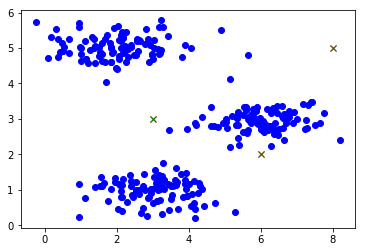

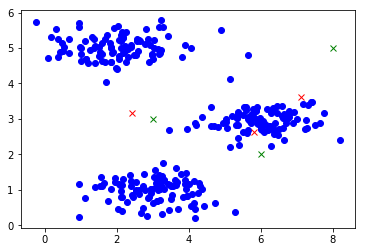

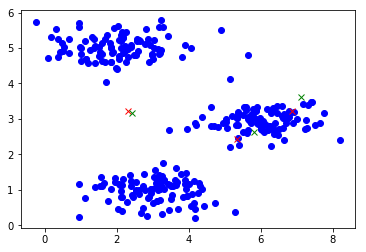

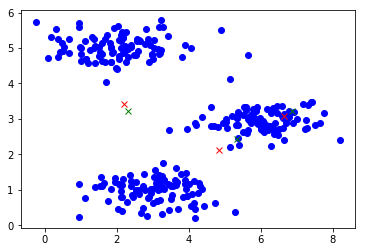

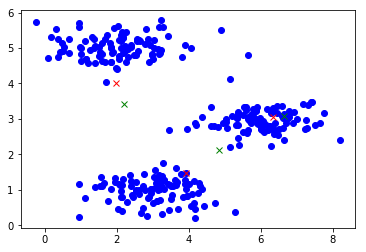

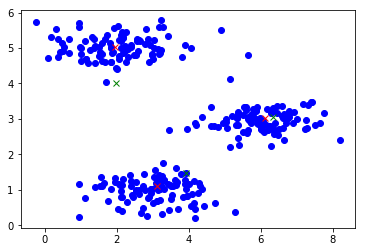

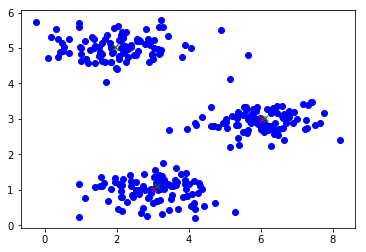

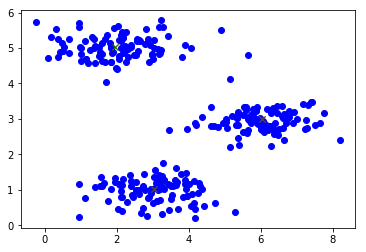

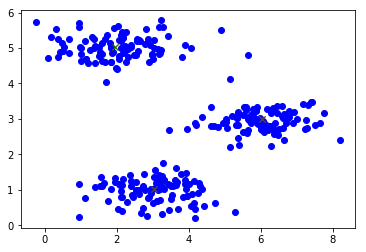

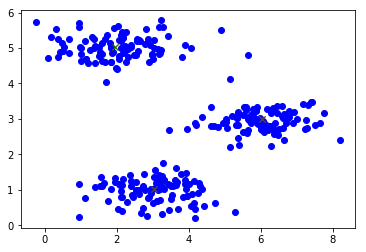

In [10]:
# K-means Clustering
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
centroids, idx = runKMeans(X, initial_centroids, max_iters, plot_progress=True)

# Part 2(Image Compression using K-means Clustering)

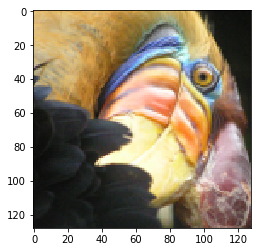

In [11]:
#  K-means Clustering on Pixels
A = plt.imread("bird_small.png")
plt.imshow(A)
plt.show()


In [12]:
original_shape = np.shape(A)
print(original_shape)


(128, 128, 3)


In [13]:
# Reshape A to get R, G, B values for each pixel
X = A.reshape((np.size(A, 0)*np.size(A, 1), 3))
K = 16
max_iters = 10

In [14]:
# Initialize centroids
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters, plot_progress=False)




In [15]:
print(centroids.shape)

(16, 3)


In [16]:
# Image Compression
idx = findClosestCentroids(X, centroids)

#Setting the Pixel values to Centroid values
X_recovered = centroids[idx,:]
print(X_recovered.shape)


(16384, 3)


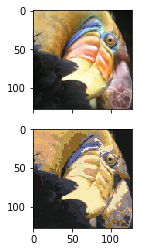

In [30]:
X_recovered = X_recovered.reshape(original_shape)

# Display 
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.imshow(A)
ax2.imshow(X_recovered)